<a href="https://colab.research.google.com/github/LeonardoCechellaVelho/machine-learning/blob/master/min_max_coracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")
dataset = pd.read_csv("heart.csv")

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# x_entrada = dataset[['Age', 'EstimatedSalary']]
# y_saida = dataset['Purchased']

x_entrada = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_saida = dataset['target']

In [ ]:
x_entrada

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y_saida

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_entrada, y_saida, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
tamanho_entrada = x_entrada.shape[1]

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=[x_entrada.shape[1]], activation='relu'))

model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                560       
                                                                 
 dense_13 (Dense)            (None, 40)                1640      
                                                                 
 dense_14 (Dense)            (None, 40)                1640      
                                                                 
 dense_15 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=35,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/200
6/6 [==============================] - 1s 46ms/step - loss: 0.6747 - accuracy: 0.6464 - val_loss: 0.6581 - val_accuracy: 0.6957
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6496 - accuracy: 0.6906 - val_loss: 0.6422 - val_accuracy: 0.7174
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.6302 - accuracy: 0.7072 - val_loss: 0.6225 - val_accuracy: 0.7174
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6097 - accuracy: 0.7403 - val_loss: 0.6000 - val_accuracy: 0.7609
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.5875 - accuracy: 0.7514 - val_loss: 0.5750 - val_accuracy: 0.7609
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.5666 - accuracy: 0.7680 - val_loss: 0.5390 - val_accuracy: 0.8043
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 0.5414 - accuracy: 0.7956 - val_loss: 0.5079 - val_accuracy: 0.8478
Epoch 8/200
6/6 [=======

Text(0.5, 0, 'Epoch')

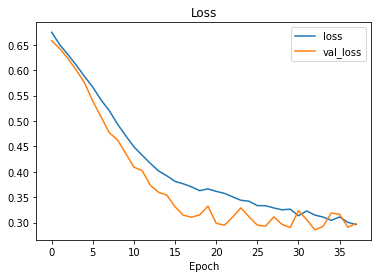

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



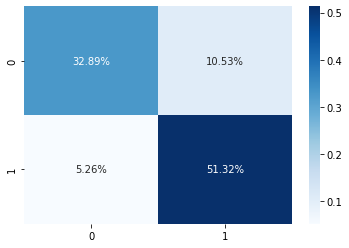

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

cf_matrix = confusion_matrix(y_test, y_pred_bin)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')